In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import BatchNormalization
import os
from matplotlib import pyplot as plt
import numpy as np

In [2]:
IMG_HEIGHT=48 
IMG_WIDTH = 48
batch_size=32

In [3]:
train_data_dir='data/train/'
validation_data_dir='data/test/'

In [4]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=30,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest')

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
                    train_data_dir,
                    color_mode='grayscale',
                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True)

Found 24176 images belonging to 5 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
                            validation_data_dir,
                            color_mode='grayscale',
                            target_size=(IMG_HEIGHT, IMG_WIDTH),
                            batch_size=batch_size,
                            class_mode='categorical',
                            shuffle=True).

Found 6043 images belonging to 5 classes.


In [8]:
#verifying the generator by printing rightful labels
class_labels=['Angry','Happy', 'Neutral', 'Sad', 'Suprise']
img, label=train_generator.__next__()

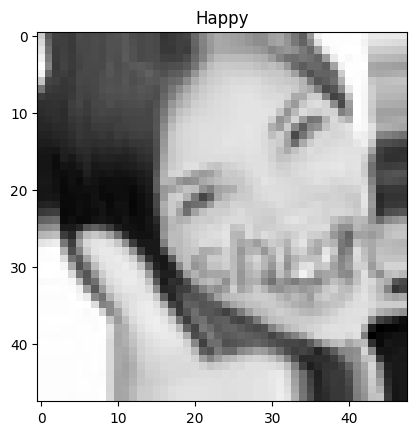

In [9]:
import random

i=random.randint(0, (img.shape[0]-1))
image=img[i]
labl=class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
plt.title(labl)
plt.show()

In [10]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        36928     
                                                                 
 batch_normalization_1 (Batc  (None, 44, 44, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                        

In [11]:
train_path = "data/train/"
test_path = "data/test"

num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)

num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)


epochs=50

In [12]:
history=model.fit(train_generator,
                steps_per_epoch=num_train_imgs//batch_size,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=num_test_imgs//batch_size)

model.save('emotion_detection_model_50epochs.h5')

Epoch 1/50
755/755 [==============================] - 84s 92ms/step - loss: 1.8283 - accuracy: 0.2736 - val_loss: 1.5403 - val_accuracy: 0.3595
Epoch 2/50
755/755 [==============================] - 37s 49ms/step - loss: 1.5045 - accuracy: 0.3750 - val_loss: 1.2660 - val_accuracy: 0.4671
Epoch 3/50
755/755 [==============================] - 37s 49ms/step - loss: 1.3306 - accuracy: 0.4500 - val_loss: 1.2617 - val_accuracy: 0.5050
Epoch 4/50
755/755 [==============================] - 37s 49ms/step - loss: 1.2082 - accuracy: 0.5093 - val_loss: 1.1851 - val_accuracy: 0.5399
Epoch 5/50
755/755 [==============================] - 37s 49ms/step - loss: 1.1174 - accuracy: 0.5538 - val_loss: 1.0608 - val_accuracy: 0.5914
Epoch 6/50
755/755 [==============================] - 37s 49ms/step - loss: 1.0731 - accuracy: 0.5764 - val_loss: 1.0438 - val_accuracy: 0.5992
Epoch 7/50
755/755 [==============================] - 37s 49ms/step - loss: 1.0347 - accuracy: 0.5876 - val_loss: 0.9344 - val_accuracy:

In [13]:
from keras.models import load_model

#Test the model
my_model = load_model('emotion_detection_model_50epochs.h5', compile=False)

In [14]:
#Generate a batch of images
test_img, test_lbl = validation_generator.__next__()
predictions=my_model.predict(test_img)

predictions = np.argmax(predictions, axis=1)
test_labels = np.argmax(test_lbl, axis=1)

1/1 [==============================] - 0s 263ms/step


In [15]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, predictions))

Accuracy =  0.84375


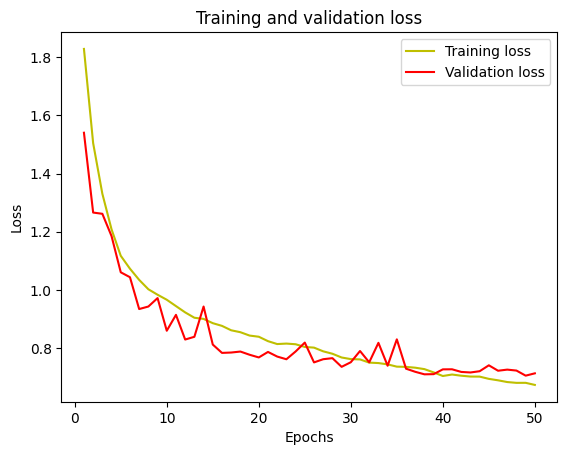

In [16]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

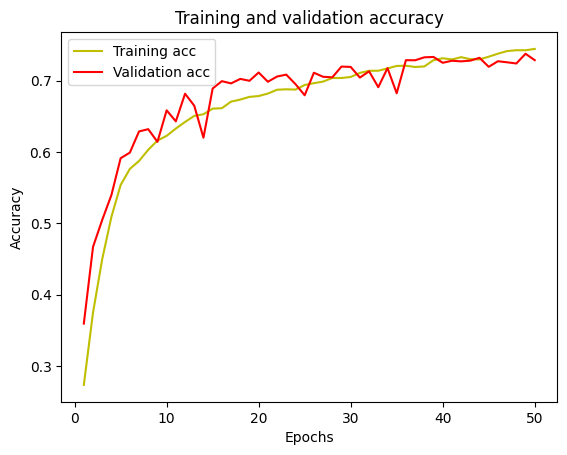

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

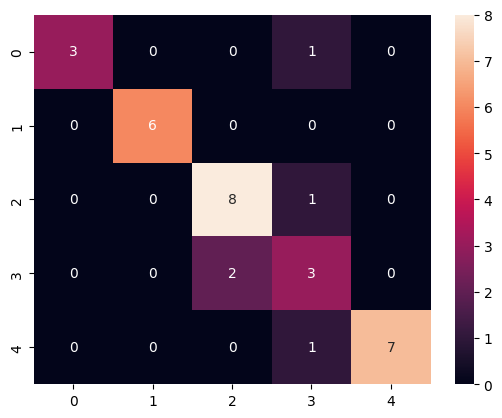

In [18]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

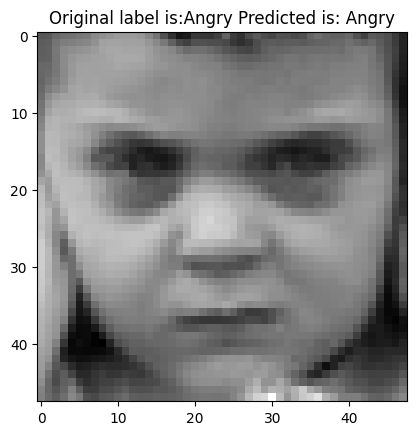

In [19]:
class_labels=['Angry','Happy','Neutral','Sad','Surprise']

#Check results on a few select images
n=random.randint(0, test_img.shape[0] - 1)
image = test_img[n]
orig_labl = class_labels[test_labels[n]]
pred_labl = class_labels[predictions[n]]
plt.imshow(image[:,:,0], cmap='gray')
plt.title("Original label is:"+orig_labl+" Predicted is: "+ pred_labl)
plt.show()

In [20]:
from sklearn.metrics import classification_report

cr = classification_report(test_labels, predictions)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       1.00      1.00      1.00         6
           2       0.80      0.89      0.84         9
           3       0.50      0.60      0.55         5
           4       1.00      0.88      0.93         8

    accuracy                           0.84        32
   macro avg       0.86      0.82      0.84        32
weighted avg       0.87      0.84      0.85        32



In [21]:
from sklearn.metrics import roc_curve, auc

# Load the trained model
my_model = load_model('emotion_detection_model_50epochs.h5')

# Generate a batch of images and corresponding labels
test_img, test_lbl = validation_generator.__next__()

# Get the predicted probabilities for each class
predictions = my_model.predict(test_img)

1/1 [==============================] - 0s 198ms/step


In [22]:
# Compute the false positive rate (FPR) and true positive rate (TPR) for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(class_labels)):
    fpr[i], tpr[i], _ = roc_curve(test_lbl[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

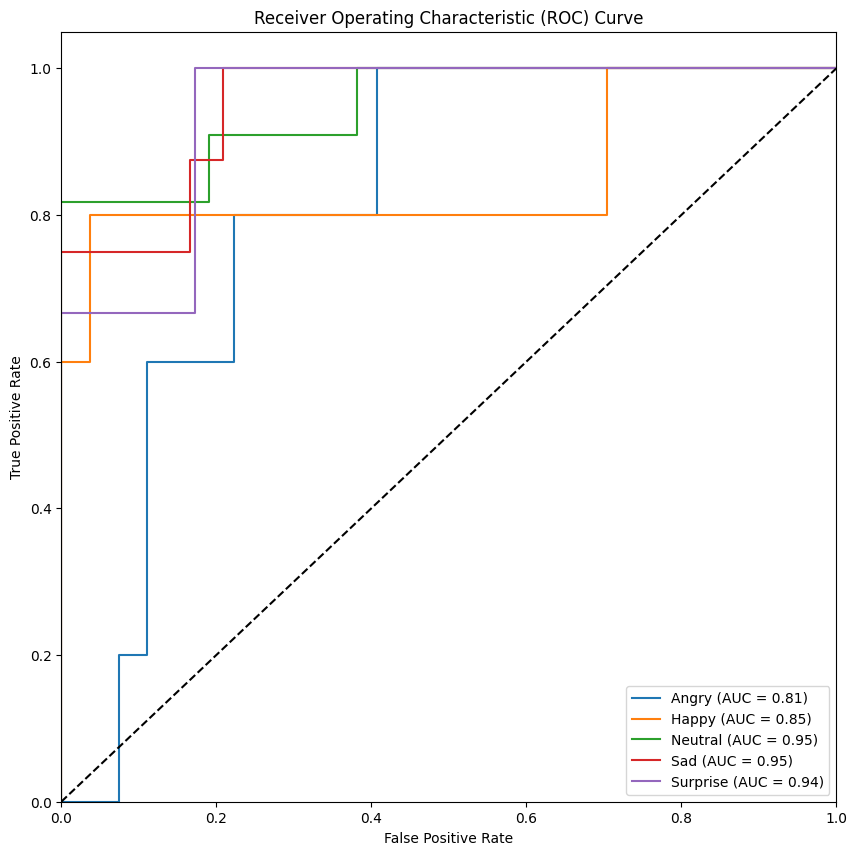

In [23]:
# Plot the ROC curve for each class
plt.figure(figsize=(10, 10))
for i in range(len(class_labels)):
    plt.plot(fpr[i], tpr[i], label='{} (AUC = {:.2f})'.format(class_labels[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()